In [13]:
import os
import subprocess
import time
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
results = {}

for file in tqdm(sorted((f for f in os.listdir('2025') if f.endswith('.py')), 
                        key=lambda f: (int(f.split('_')[0]), int(f.split('_')[1].split('.')[0])))):
    start = time.perf_counter()

    completed = subprocess.run(
        ["python", os.path.join("2025", file)],
        capture_output=True,
        text=True
    )

    end = time.perf_counter()
    results[file] = {}
    results[file]['time'] = end - start ; results[file]['result'] = completed.stdout.strip('\n')

results = pd.DataFrame(results).T
print(results)

100%|██████████| 23/23 [00:26<00:00,  1.15s/it]

             time           result
1_1.py   0.029635             1081
1_2.py   0.038544             6689
2_1.py   1.011011      19386344315
2_2.py   7.005935      34421651192
3_1.py   0.020773            17179
3_2.py   0.089912  170025781683941
4_1.py   0.047632             1493
4_2.py    0.47489             9194
5_1.py    0.02621              848
5_2.py   0.025386  334714395325710
6_1.py   0.035898    6172481852142
6_2.py   0.034069   10188206723429
7_1.py   0.033121             1687
7_2.py   0.033099  390684413472684
8_1.py   3.117769                8
8_2.py   6.445341        772452514
9_1.py   0.100233       4776487744
9_2.py   4.342773       1560299548
10_1.py  1.303512              547
10_2.py  1.747436            21111
11_1.py  0.209048              477
11_2.py  0.210096  383307150903216
12_1.py  0.028678              463


/tmp/ipykernel_36934/3924188691.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlab, rotation=45)


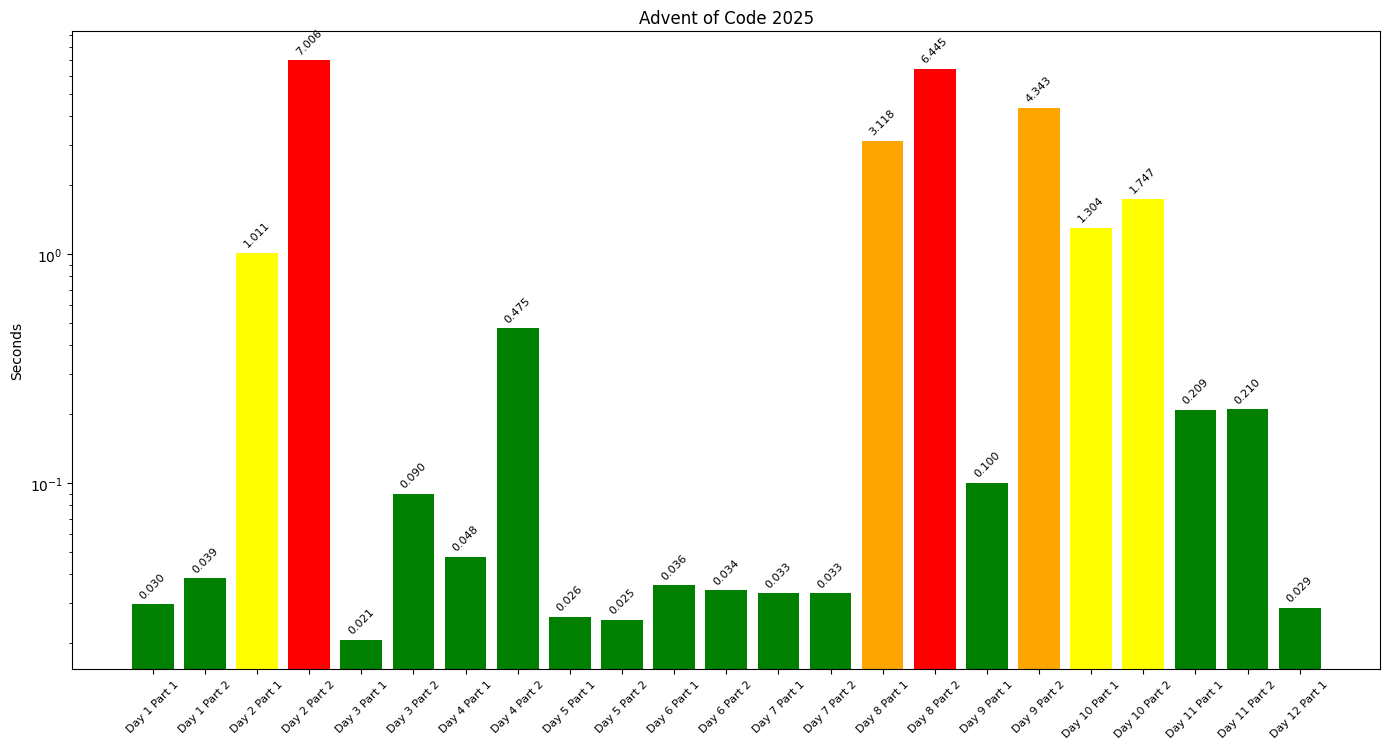

In [66]:
xlab = [f'Day {x[:-3].split('_')[0]} Part {x[:-3].split('_')[1]}' for x in results.index.to_list()]

def time_to_color(t):
    if t < 1:
        return "green"
    elif t < 2:
        return "yellow"
    elif t < 5:
        return "orange"
    else:
        return "red"

colors = [time_to_color(t) for t in results['time']]

# Create larger figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars = ax.bar(xlab, results['time'], color=colors)

# Log scale
ax.set_yscale('log')

# Labels and ticks
ax.set_ylabel('Seconds')
ax.set_title('Advent of Code 2025')

ax.set_xticklabels(xlab, rotation=45)
ax.tick_params(axis='x', labelsize=8)

# Value labels
ax.bar_label(bars, fmt='%.3f', padding=3, rotation=45, fontsize=8)

# Prevent clipping (leave room for title)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


/tmp/ipykernel_36934/2526794752.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlab, rotation=45, ha='right', rotation_mode='anchor')


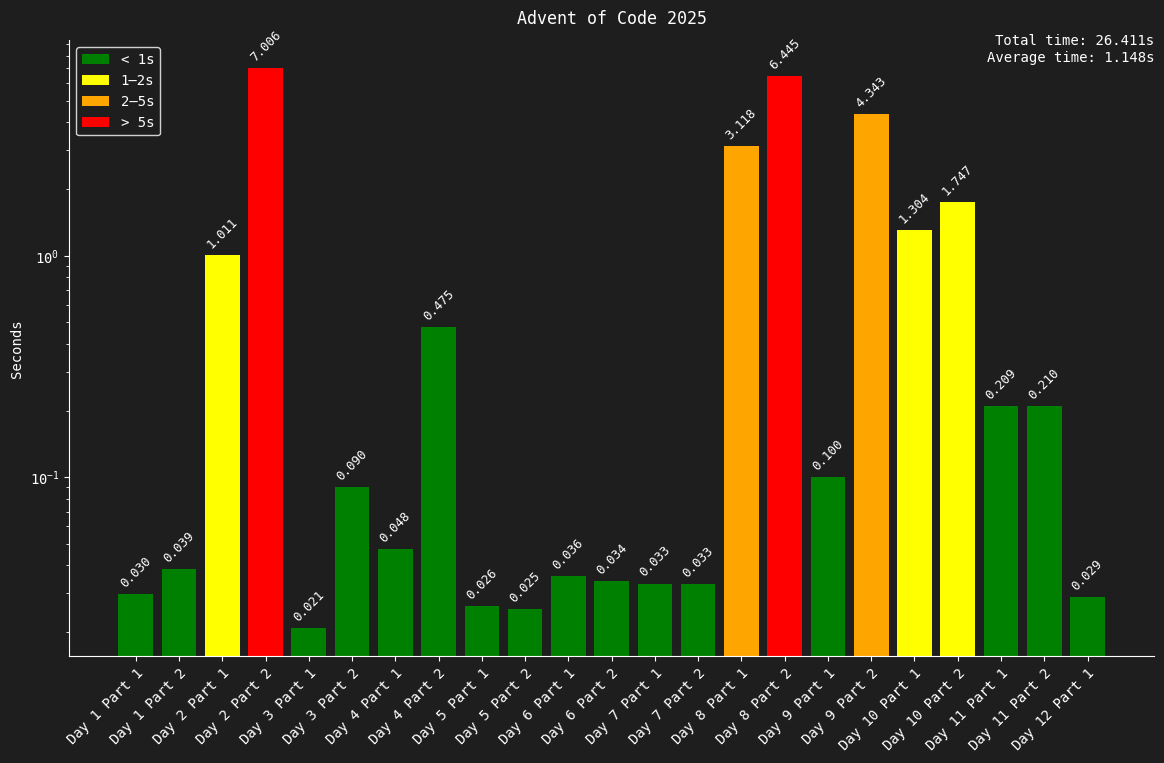

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Monospace font
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['font.monospace'] = ['DejaVu Sans Mono']

# Colors
BG = '#1e1e1e'     # dark grey background
FG = 'white'       # foreground text

# Build x-axis labels
xlab = [
    f"Day {x[:-3].split('_')[0]} Part {x[:-3].split('_')[1]}"
    for x in results.index.to_list()
]

def time_to_color(t):
    if t < 1:
        return "green"
    elif t < 2:
        return "yellow"
    elif t < 5:
        return "orange"
    else:
        return "red"

colors = [time_to_color(t) for t in results['time']]

# Create figure with dark-grey background
fig, ax = plt.subplots(figsize=(14, 8), facecolor=BG)
ax.set_facecolor(BG)

# Bars
bars = ax.bar(xlab, results['time'], color=colors)

# Log scale
ax.set_yscale('log')

# Labels and title
ax.set_ylabel('Seconds', color=FG)
ax.set_title('Advent of Code 2025', color=FG, pad=12)

# Ticks
ax.tick_params(axis='x', labelsize=10, colors=FG)
ax.tick_params(axis='y', colors=FG)
ax.set_xticklabels(xlab, rotation=45, ha='right', rotation_mode='anchor')

# Value labels
ax.bar_label(
    bars,
    fmt='%.3f',
    padding=3,
    rotation=45,
    fontsize=9,
    color=FG
)

# Remove top/right spines, style remaining
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(FG)
ax.spines['bottom'].set_color(FG)

# Legend
legend_elements = [
    Patch(facecolor='green', label='< 1s'),
    Patch(facecolor='yellow', label='1–2s'),
    Patch(facecolor='orange', label='2–5s'),
    Patch(facecolor='red', label='> 5s'),
]
ax.legend(
    handles=legend_elements,
    loc='upper left',
    facecolor=BG,
    edgecolor=FG,
    labelcolor=FG
)

fig.text(
    0.9, 0.85,
    f"Total time: {results['time'].sum():.3f}s\nAverage time: {results['time'].mean():.3f}s",
    ha='right',
    va='bottom',
    color=FG,
    fontsize=10,
    family='monospace'
)

# Extra room for title
fig.subplots_adjust(top=0.88)
plt.savefig('2025/aoc_2025_times.png', dpi=200, facecolor=BG, bbox_inches='tight')
plt.show()
